## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  93.056810  1566.727849  0.907420  10.336591  1.459905
1  15.712615  1069.882488  0.115379   8.102789  1.561179
2  44.463934  1612.511930  0.431387   5.765059  1.577822
3  39.757147   665.480088  0.870950   4.663741  1.376886
4  40.917475   190.639240  0.577663   2.470779  1.319174


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.29527 | train_mse: 3.9053  | train_mae: 1.58219 |  0:00:00s
epoch 1  | loss: 0.86206 | train_mse: 2.10846 | train_mae: 1.11155 |  0:00:00s


epoch 2  | loss: 0.68762 | train_mse: 2.29243 | train_mae: 1.133   |  0:00:00s
epoch 3  | loss: 0.55484 | train_mse: 3.47247 | train_mae: 1.30419 |  0:00:00s


epoch 4  | loss: 0.48517 | train_mse: 1.76524 | train_mae: 0.94447 |  0:00:01s


epoch 5  | loss: 0.44591 | train_mse: 0.82586 | train_mae: 0.6835  |  0:00:01s
epoch 6  | loss: 0.55167 | train_mse: 0.63191 | train_mae: 0.56764 |  0:00:01s

epoch 7  | loss: 0.45923 | train_mse: 0.63447 | train_mae: 0.55472 |  0:00:01s
epoch 8  | loss: 0.37735 | train_mse: 0.77307 | train_mae: 0.55748 |  0:00:02s


epoch 9  | loss: 0.65962 | train_mse: 0.7889  | train_mae: 0.60891 |  0:00:02s
epoch 10 | loss: 0.38558 | train_mse: 0.55386 | train_mae: 0.52811 |  0:00:02s


epoch 11 | loss: 0.44446 | train_mse: 0.46299 | train_mae: 0.48396 |  0:00:02s


epoch 12 | loss: 0.44533 | train_mse: 0.55536 | train_mae: 0.55706 |  0:00:02s
epoch 13 | loss: 0.36401 | train_mse: 0.43406 | train_mae: 0.50743 |  0:00:03s


epoch 14 | loss: 0.23694 | train_mse: 0.56192 | train_mae: 0.51201 |  0:00:03s
epoch 15 | loss: 0.38734 | train_mse: 0.48584 | train_mae: 0.48364 |  0:00:03s


epoch 16 | loss: 0.36058 | train_mse: 0.42879 | train_mae: 0.44928 |  0:00:03s
epoch 17 | loss: 0.39627 | train_mse: 0.29625 | train_mae: 0.38785 |  0:00:03s


epoch 18 | loss: 0.29754 | train_mse: 0.31324 | train_mae: 0.40428 |  0:00:03s


epoch 19 | loss: 0.30489 | train_mse: 0.28936 | train_mae: 0.38915 |  0:00:04s
epoch 20 | loss: 0.33024 | train_mse: 0.26699 | train_mae: 0.37946 |  0:00:04s


epoch 21 | loss: 0.34146 | train_mse: 0.28763 | train_mae: 0.37313 |  0:00:04s


epoch 22 | loss: 0.44263 | train_mse: 0.29042 | train_mae: 0.3634  |  0:00:04s
epoch 23 | loss: 0.25608 | train_mse: 0.3195  | train_mae: 0.38305 |  0:00:04s


epoch 24 | loss: 0.26637 | train_mse: 0.26484 | train_mae: 0.36979 |  0:00:05s
epoch 25 | loss: 0.22559 | train_mse: 0.26544 | train_mae: 0.35868 |  0:00:05s


epoch 26 | loss: 0.21198 | train_mse: 0.2128  | train_mae: 0.34159 |  0:00:05s


epoch 27 | loss: 0.1987  | train_mse: 0.19285 | train_mae: 0.33326 |  0:00:05s


epoch 28 | loss: 0.25968 | train_mse: 0.20292 | train_mae: 0.33107 |  0:00:06s


epoch 29 | loss: 0.2898  | train_mse: 0.24074 | train_mae: 0.35833 |  0:00:06s


epoch 30 | loss: 0.17496 | train_mse: 0.25393 | train_mae: 0.38124 |  0:00:06s
epoch 31 | loss: 0.3077  | train_mse: 0.20501 | train_mae: 0.35795 |  0:00:07s


epoch 32 | loss: 0.16045 | train_mse: 0.19648 | train_mae: 0.34977 |  0:00:07s


epoch 33 | loss: 0.31492 | train_mse: 0.15931 | train_mae: 0.31955 |  0:00:07s


epoch 34 | loss: 0.20193 | train_mse: 0.15701 | train_mae: 0.32326 |  0:00:07s
epoch 35 | loss: 0.14862 | train_mse: 0.17856 | train_mae: 0.3474  |  0:00:08s


epoch 36 | loss: 0.29811 | train_mse: 0.20354 | train_mae: 0.36386 |  0:00:08s
epoch 37 | loss: 0.18096 | train_mse: 0.17011 | train_mae: 0.3309  |  0:00:08s


epoch 38 | loss: 0.17445 | train_mse: 0.15943 | train_mae: 0.3239  |  0:00:08s
epoch 39 | loss: 0.1786  | train_mse: 0.14892 | train_mae: 0.29602 |  0:00:08s


epoch 40 | loss: 0.17314 | train_mse: 0.16037 | train_mae: 0.28692 |  0:00:08s
epoch 41 | loss: 0.24557 | train_mse: 0.15188 | train_mae: 0.29718 |  0:00:08s


epoch 42 | loss: 0.17194 | train_mse: 0.16351 | train_mae: 0.3209  |  0:00:08s


epoch 43 | loss: 0.31106 | train_mse: 0.21378 | train_mae: 0.35505 |  0:00:09s


epoch 44 | loss: 0.13642 | train_mse: 0.16451 | train_mae: 0.31563 |  0:00:09s
epoch 45 | loss: 0.1661  | train_mse: 0.12956 | train_mae: 0.2745  |  0:00:09s


epoch 46 | loss: 0.17199 | train_mse: 0.1147  | train_mae: 0.27296 |  0:00:09s
epoch 47 | loss: 0.23903 | train_mse: 0.09134 | train_mae: 0.24596 |  0:00:09s


epoch 48 | loss: 0.33844 | train_mse: 0.09044 | train_mae: 0.22794 |  0:00:10s
epoch 49 | loss: 0.14619 | train_mse: 0.08179 | train_mae: 0.21943 |  0:00:10s


epoch 50 | loss: 0.12156 | train_mse: 0.11423 | train_mae: 0.24509 |  0:00:10s


epoch 51 | loss: 0.20841 | train_mse: 0.14105 | train_mae: 0.27309 |  0:00:10s
epoch 52 | loss: 0.20127 | train_mse: 0.13135 | train_mae: 0.2829  |  0:00:11s


epoch 53 | loss: 0.32469 | train_mse: 0.10522 | train_mae: 0.25938 |  0:00:11s
epoch 54 | loss: 0.12151 | train_mse: 0.08722 | train_mae: 0.23528 |  0:00:11s


epoch 55 | loss: 0.16732 | train_mse: 0.11898 | train_mae: 0.2802  |  0:00:11s
epoch 56 | loss: 0.16539 | train_mse: 0.11425 | train_mae: 0.26564 |  0:00:12s


epoch 57 | loss: 0.24784 | train_mse: 0.10456 | train_mae: 0.26214 |  0:00:12s


epoch 58 | loss: 0.21448 | train_mse: 0.09122 | train_mae: 0.23467 |  0:00:12s


epoch 59 | loss: 0.17312 | train_mse: 0.09045 | train_mae: 0.2285  |  0:00:12s


epoch 60 | loss: 0.19886 | train_mse: 0.11475 | train_mae: 0.2488  |  0:00:13s


epoch 61 | loss: 0.2255  | train_mse: 0.09959 | train_mae: 0.23461 |  0:00:13s


epoch 62 | loss: 0.21469 | train_mse: 0.10748 | train_mae: 0.26552 |  0:00:13s


epoch 63 | loss: 0.17092 | train_mse: 0.16545 | train_mae: 0.32276 |  0:00:13s


epoch 64 | loss: 0.29264 | train_mse: 0.16268 | train_mae: 0.3039  |  0:00:14s


epoch 65 | loss: 0.1714  | train_mse: 0.12813 | train_mae: 0.27138 |  0:00:14s
epoch 66 | loss: 0.24335 | train_mse: 0.14075 | train_mae: 0.27874 |  0:00:14s


epoch 67 | loss: 0.15146 | train_mse: 0.15313 | train_mae: 0.28872 |  0:00:14s


epoch 68 | loss: 0.19829 | train_mse: 0.12589 | train_mae: 0.28234 |  0:00:14s


epoch 69 | loss: 0.29198 | train_mse: 0.14217 | train_mae: 0.30242 |  0:00:15s


epoch 70 | loss: 0.18391 | train_mse: 0.13899 | train_mae: 0.28294 |  0:00:15s


epoch 71 | loss: 0.16828 | train_mse: 0.11487 | train_mae: 0.26269 |  0:00:16s


epoch 72 | loss: 0.14912 | train_mse: 0.11438 | train_mae: 0.26286 |  0:00:16s


epoch 73 | loss: 0.12495 | train_mse: 0.11695 | train_mae: 0.2629  |  0:00:16s


epoch 74 | loss: 0.24618 | train_mse: 0.1336  | train_mae: 0.28293 |  0:00:17s


epoch 75 | loss: 0.16524 | train_mse: 0.12129 | train_mae: 0.27508 |  0:00:17s


epoch 76 | loss: 0.12723 | train_mse: 0.12014 | train_mae: 0.26828 |  0:00:17s


epoch 77 | loss: 0.35262 | train_mse: 0.16377 | train_mae: 0.29553 |  0:00:17s


epoch 78 | loss: 0.11233 | train_mse: 0.14968 | train_mae: 0.28888 |  0:00:18s


epoch 79 | loss: 0.20217 | train_mse: 0.12238 | train_mae: 0.27429 |  0:00:18s
epoch 80 | loss: 0.24084 | train_mse: 0.09863 | train_mae: 0.24706 |  0:00:18s


epoch 81 | loss: 0.18856 | train_mse: 0.10658 | train_mae: 0.25795 |  0:00:19s


epoch 82 | loss: 0.24607 | train_mse: 0.13423 | train_mae: 0.28695 |  0:00:19s


epoch 83 | loss: 0.21672 | train_mse: 0.15617 | train_mae: 0.30769 |  0:00:19s
epoch 84 | loss: 0.18419 | train_mse: 0.15083 | train_mae: 0.30545 |  0:00:19s


epoch 85 | loss: 0.1621  | train_mse: 0.1589  | train_mae: 0.30395 |  0:00:19s
epoch 86 | loss: 0.18608 | train_mse: 0.17499 | train_mae: 0.30655 |  0:00:20s


epoch 87 | loss: 0.18669 | train_mse: 0.1813  | train_mae: 0.3295  |  0:00:20s
epoch 88 | loss: 0.1869  | train_mse: 0.12861 | train_mae: 0.27153 |  0:00:20s


epoch 89 | loss: 0.16459 | train_mse: 0.15456 | train_mae: 0.28164 |  0:00:20s
epoch 90 | loss: 0.17877 | train_mse: 0.17445 | train_mae: 0.29674 |  0:00:20s


epoch 91 | loss: 0.2705  | train_mse: 0.20103 | train_mae: 0.3405  |  0:00:21s
epoch 92 | loss: 0.18492 | train_mse: 0.2257  | train_mae: 0.37855 |  0:00:21s


epoch 93 | loss: 0.20163 | train_mse: 0.19559 | train_mae: 0.32355 |  0:00:21s


epoch 94 | loss: 0.15371 | train_mse: 0.12308 | train_mae: 0.26893 |  0:00:21s


epoch 95 | loss: 0.27339 | train_mse: 0.10922 | train_mae: 0.24136 |  0:00:22s


epoch 96 | loss: 0.16671 | train_mse: 0.09109 | train_mae: 0.2277  |  0:00:22s


epoch 97 | loss: 0.1452  | train_mse: 0.123   | train_mae: 0.2636  |  0:00:22s
epoch 98 | loss: 0.22056 | train_mse: 0.13094 | train_mae: 0.27258 |  0:00:22s


epoch 99 | loss: 0.12706 | train_mse: 0.09105 | train_mae: 0.21968 |  0:00:22s

Early stopping occurred at epoch 99 with best_epoch = 49 and best_train_mae = 0.21943
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

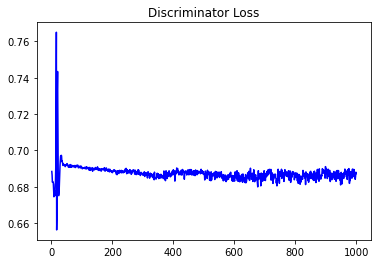

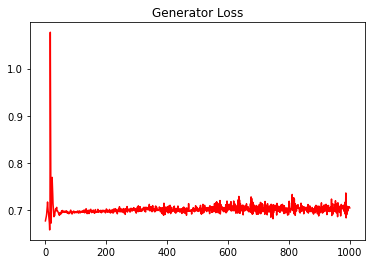

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3876911242957858


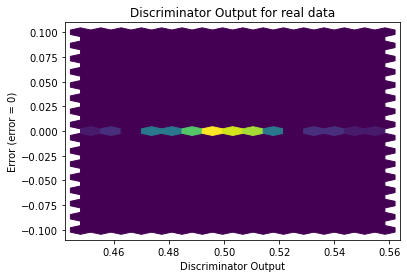

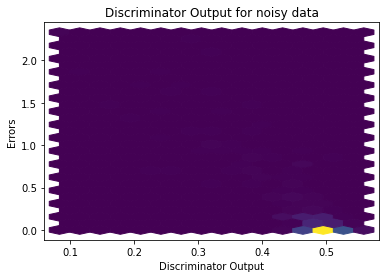

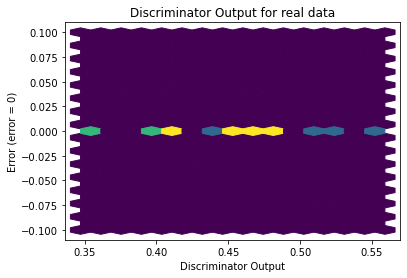

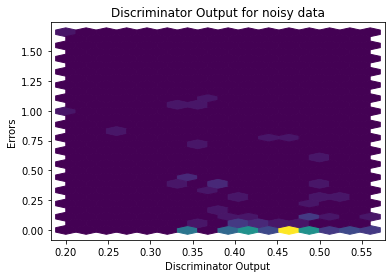

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


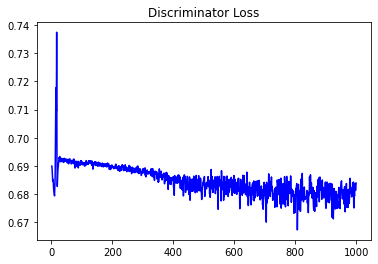

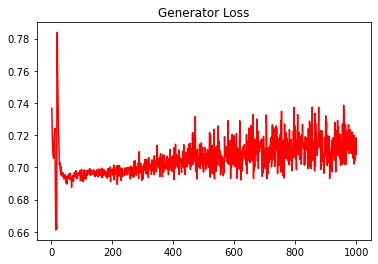

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.34938907265249436


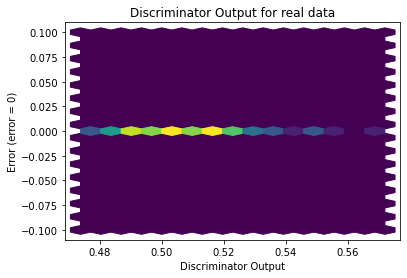

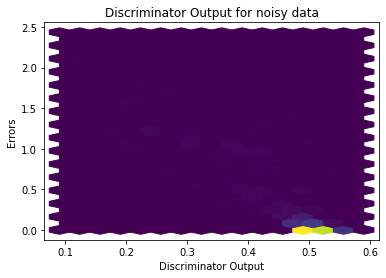

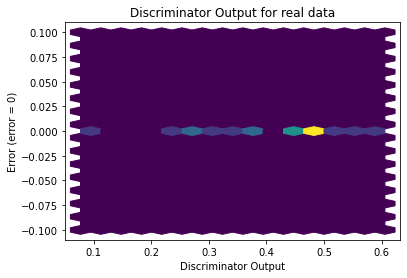

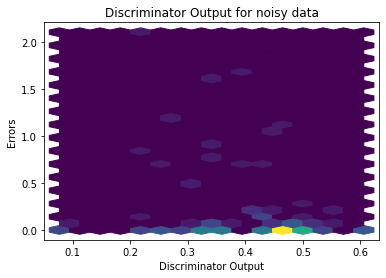

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.9448]], requires_grad=True)
